<h1><center> Arrival Time Visualization <br><br> 
<center> Differential Privacy Application<br><br> 
Wendy Shi</center></center>

# Preparation

In [1]:
#Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import scipy.stats as stats
import statistics

# Original weight matrix

In [2]:
Ori_mt = pd.read_csv("AZ_Data/Individual/AZ_ori_indi.csv")
Ori_mt = Ori_mt.drop(columns = 'Unnamed: 0')

P8_mt = pd.read_csv("AZ_Data/Individual/AZ_P8_indi.csv")
P8_mt = P8_mt.drop(columns = 'Unnamed: 0')

P5_mt = pd.read_csv("AZ_Data/Individual/AZ_P5_indi.csv")
P5_mt = P5_mt.drop(columns = 'Unnamed: 0')

P3_mt = pd.read_csv("AZ_Data/Individual/AZ_P3_indi.csv")
P3_mt = P3_mt.drop(columns = 'Unnamed: 0')

P1_mt = pd.read_csv("AZ_Data/Individual/AZ_P1_indi.csv")
P1_mt = P1_mt.drop(columns = 'Unnamed: 0')

P05_mt = pd.read_csv("AZ_Data/Individual/AZ_P05_indi.csv")
P05_mt = P05_mt.drop(columns = 'Unnamed: 0')

P01_mt = pd.read_csv("AZ_Data/Individual/AZ_P01_indi.csv")
P01_mt = P01_mt.drop(columns = 'Unnamed: 0')

P005_mt = pd.read_csv("AZ_Data/Individual/AZ_P005_indi.csv")
P005_mt = P005_mt.drop(columns = 'Unnamed: 0')

In [3]:
P005_mt.head(3)

,04001,04003,04005,04007,04009,04012,04013,04015,04017,04019,04021,04023,04025,04027
0,0.262693,0.008100,0.013837,0.003008,0.001919,0.000123,0.458792,0.005084,0.058182,0.092492,0.055978,0.003980,0.020903,0.014909
1,0.000553,0.660420,0.002195,0.001627,0.001929,0.000000,0.125124,0.001397,0.001939,0.184007,0.012318,0.007418,0.000590,0.000484
2,0.004857,0.001352,0.745621,0.004568,0.000043,0.000829,0.169590,0.003896,0.003559,0.023118,0.010312,0.000656,0.028014,0.003586


In [4]:
Original_np = Ori_mt.to_numpy()
P8_np = P8_mt.to_numpy()
P5_np = P5_mt.to_numpy()
P3_np = P3_mt.to_numpy()
P1_np = P1_mt.to_numpy()
P05_np = P05_mt.to_numpy()
P01_np = P01_mt.to_numpy()
P005_np = P005_mt.to_numpy()

# P_ii

In [6]:
ori_list = [Original_np[i][i] for i in range(14)]
P8_list = [P8_np[i][i] for i in range(14)]
P5_list = [P5_np[i][i] for i in range(14)]
P3_list = [P3_np[i][i] for i in range(14)]
P1_list = [P1_np[i][i] for i in range(14)]
P05_list = [P05_np[i][i] for i in range(14)]
P01_list = [P01_np[i][i] for i in range(14)]
P005_list = [P005_np[i][i] for i in range(14)]

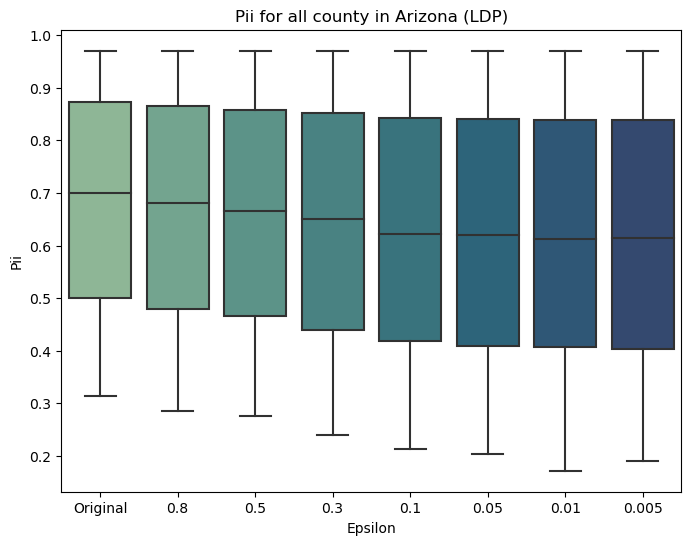

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
data = [ori_list, P8_list, P5_list, P3_list, P1_list, P05_list, P01_list, P005_list]

color = sns.color_palette("crest", n_colors=8)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette=color, saturation=0.7, showfliers=False)

# Adding labels and title
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['Original', '0.8', '0.5', '0.3', '0.1','0.05','0.01', '0.005'])
plt.title("Pii for all county in Arizona (LDP)")
plt.ylabel("Pii")
plt.xlabel("Epsilon")

# Save plot
plt.savefig("Pii_staying_indi_AZ.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


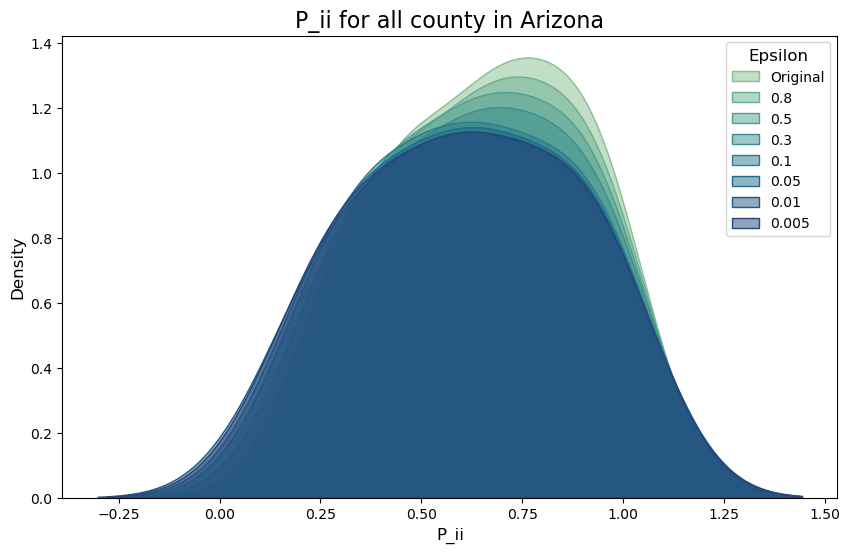

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
data = [ori_list, P8_list, P5_list, P3_list, P1_list, P05_list, P01_list, P005_list]
labels = ['Original', '0.8', '0.5', '0.3', '0.1', '0.05','0.01','0.005']

# Generate a color palette
color = sns.color_palette("crest", n_colors=8)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Loop through datasets to plot their density
for i, dataset in enumerate(data):
    sns.kdeplot(dataset, label=labels[i], color=color[i], fill=True, alpha=0.5)

# Adding labels and title
plt.title("P_ii for all county in Arizona", fontsize=16)
plt.xlabel("P_ii", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Adding a legend
plt.legend(title="Epsilon", fontsize=10, title_fontsize=12)

# Save plot (optional)
#plt.savefig("Pii_Density_Plot_all_agg.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Pij visualization, box plot

In [33]:
import math

In [34]:
def outflow_wt_all(matrix):
    
    '''
    
    This function defines all outflow rate
    
    '''
    
    P_ij = []
    
    for i in range(14):
        for j in range(14):
            if i != j:
                P_ij.append(matrix[i][j])
                
    return(P_ij)

In [35]:
def out_stat(data):
    
    series = pd.Series(data)
    
    #This print summary statistics
    minimum = series.min()
    point25 = series.quantile(0.25)
    median = series.median()
    point75 = series.quantile(0.75)
    maximum = series.max()
     
    #This print the summary statistcis    
    out_list = [minimum, point25, median, point75, maximum]
    print(out_list)
    
    #This only takes the first 75% of the data
    plotting_data = [i for i in data if i < point75]
    
    return(plotting_data)

In [36]:
out_ori = outflow_wt_all(Original_np)
print(len(out_ori))
#ori_75 = out_stat(out_ori)

182


In [37]:
log_ori = [math.log(x) for x in out_ori if x != 0]
print(len(log_ori))

180


In [38]:
out_P8 = outflow_wt_all(P8_np)
log_P8 = [math.log(x) for x in out_P8 if x != 0]
print(len(log_P8))

180


In [50]:
out_P5 = outflow_wt_all(P5_np)
log_P5 = [math.log(x) for x in out_P5 if x != 0]
print(len(log_P5))

179


In [39]:
out_P3 = outflow_wt_all(P3_np)
log_P3 = [math.log(x) for x in out_P3 if x != 0]
print(len(log_P3))

179


In [40]:
out_P1 = outflow_wt_all(P1_np)
log_P1 = [math.log(x) for x in out_P1 if x != 0]
print(len(log_P1))

178


In [48]:
out_P05 = outflow_wt_all(P05_np)
log_P05 = [math.log(x) for x in out_P05 if x != 0]
print(len(log_P05))

179


In [17]:
out_P01 = outflow_wt_all(P01_np)
log_P01 = [math.log(x) for x in out_P01 if x != 0]
print(len(log_P01))

180


In [42]:
out_P005 = outflow_wt_all(P005_np)
log_P005 = [math.log(x) for x in out_P005 if x != 0]
print(len(log_P005))

178


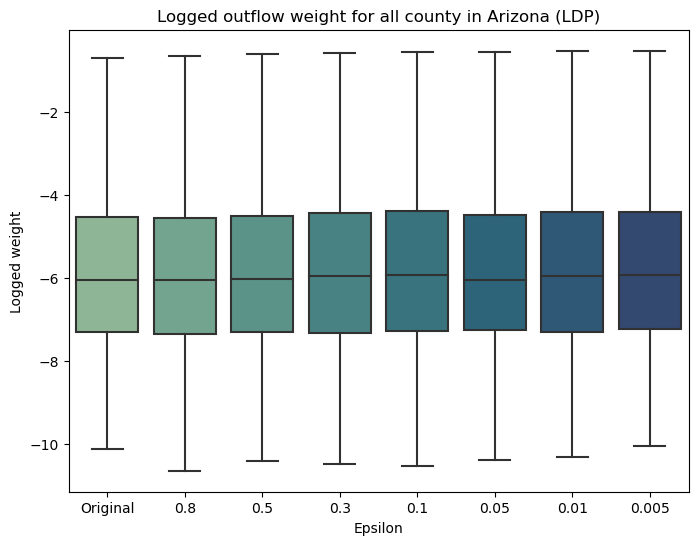

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
data = [log_ori, log_P8, log_P5, log_P3, log_P1, log_P05, log_P01, log_P005]

color = sns.color_palette("crest", n_colors=8)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette=color, saturation=0.7, showfliers=False)

# Adding labels and title
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], 
           ['Original', '0.8','0.5','0.3','0.1', '0.05','0.01','0.005'])
plt.title("Logged outflow weight for all county in Arizona (LDP)")
plt.ylabel("Logged weight")
plt.xlabel("Epsilon")

# Save plot
plt.savefig("Pij_outflow_logged_no_outlier_AZ_indi.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# Count the total number of zeros

In [20]:
#outflow zero
def outflow_zero(matrix):
    P_ij_zero = []
    
    for i in range(14):
        #all outflow weight list every county
        working_list = []
        for j in range(14):
            if i != j and matrix[i][j] == 0:
                P_ij_zero.append((i,j))
    
    return(P_ij_zero)

In [21]:
total_links = 14*14

In [22]:
zero_ori = outflow_zero(Original_np)
len(zero_ori)

2

In [23]:
zero_P8 = outflow_zero(P8_np)
len(zero_P8)

2

In [24]:
zero_P5 = outflow_zero(P5_np)
len(zero_P5)

3

In [25]:
zero_P3 = outflow_zero(P3_np)
len(zero_P3)

3

In [26]:
zero_P1 = outflow_zero(P1_np)
len(zero_P1)

4

In [27]:
zero_P05 = outflow_zero(P05_np)
len(zero_P05)

3

In [28]:
zero_P01 = outflow_zero(P01_np)
len(zero_P01)

2

In [29]:
zero_P005 = outflow_zero(P005_np)
len(zero_P005)

4

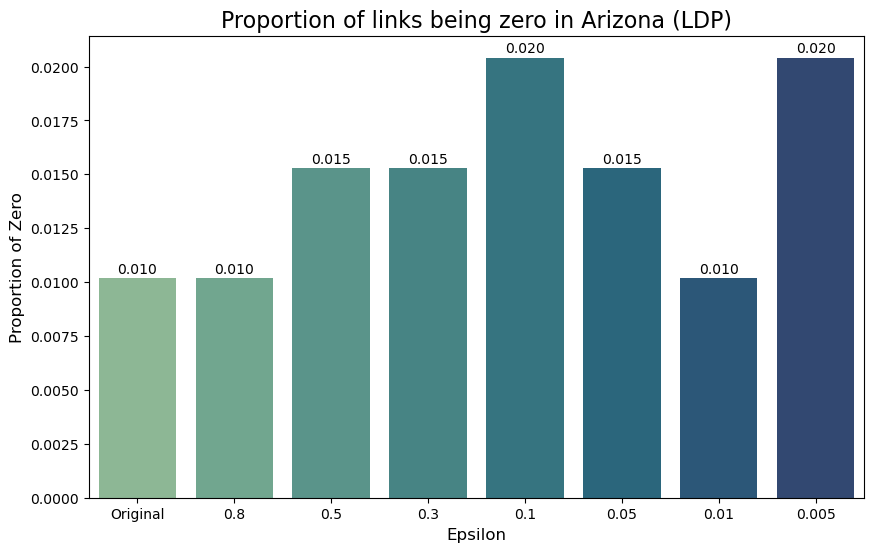

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = [len(zero_ori)/total_links,
        len(zero_P8)/total_links, 
        len(zero_P5)/total_links,
        len(zero_P3)/total_links,
        len(zero_P1)/total_links, 
        len(zero_P05)/total_links, 
        len(zero_P01)/total_links,
        len(zero_P005)/total_links
       ]
labels = ['Original', '0.8', '0.5', '0.3','0.1', '0.05', '0.01', '0.005']

# Generate a color palette
color = sns.color_palette("crest", n_colors= 8)

# Create a DataFrame for easier handling
df = pd.DataFrame({'Epsilon': labels, 'Number of Zero': data})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Epsilon', y='Number of Zero', palette=color, data=df)

# Adding labels and title
plt.title("Proportion of links being zero in Arizona (LDP)", fontsize=16)
plt.xlabel("Epsilon", fontsize=12)
plt.ylabel("Proportion of Zero", fontsize=12)

# Add data labels on each bar
for i, bar in enumerate(barplot.patches):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar_height*1.005,  # y-coordinate slightly above the bar
        f'{bar_height:.3f}',  # Data label
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Save plot (optional)
plt.savefig("Proportion_of_Zero_indi_AZ.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
